In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error

def evaluation_metrics(y_pred, y_label, thresh=0.5):
    true_pos = []
    true_neg = []
    false_pos = []
    false_neg = []

    for i in range(len(y_pred)):
        if y_label[i] < thresh and y_pred[i] < thresh:
            true_neg.append(i)
        elif y_label[i] > thresh and y_pred[i] > thresh:
            true_pos.append(i)
        elif y_label[i] < thresh and y_pred[i] > thresh:
            false_pos.append(i)
        elif y_label[i] > thresh and y_pred[i] < thresh:
            false_neg.append(i)

    TP = len(true_pos)
    TN = len(true_neg)
    FP = len(false_pos)
    FN = len(false_neg)

    fpr, tpr, thresholds = roc_curve(y_label, y_pred, pos_label=1)

    eval = \
    {
        'accuracy'  : (TP + TN) / (TP + TN + TN + FN) if (TP + TN + TN + FN) > 0 else 0, 
        'precision' : TP / (TP + FP) if (TP + FP) > 0 else 0,
        'recall'    : TP / (TP + FN) if (TP + FN) > 0 else 0,
        'f1'        : (2*TP) / (2*TP + FP + FN) if (TP + FP + FN) > 0 else 0,
        'roc_auc'   : auc(fpr, tpr),
        'fpr'       : fpr,
        'tpr'       : tpr
    }

    return eval

In [2]:
# *** LOAD DATA *** 
from sklearn.model_selection import train_test_split

nominal_sample = pd.read_csv('2015_sample.csv')
failure_sample = pd.read_csv('2015_failures.csv')

# For further testing on data from the future
#future_nominal = pd.read_csv('2018_q1_sample.csv')
#future_failure = pd.read_csv('2018_q1_failures.csv')

nominal_sample = nominal_sample.dropna(axis=0, thresh=20).dropna(axis=1)
failure_sample = failure_sample.dropna(axis=0, thresh=20).dropna(axis=1)

feature_columns = [ 'smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized', 'smart_5_normalized',
           'smart_7_normalized','smart_12_normalized', 'smart_194_normalized', 
           'smart_197_normalized', 'smart_198_normalized', 'smart_199_normalized']

data_curr = pd.concat([nominal_sample, failure_sample])

In [263]:

y_curr = data_curr['failure']
x_curr = (data_curr[feature_columns])

x_train, x_val, y_train, y_val = train_test_split(x_curr, y_curr, train_size=0.8, random_state=1)

#data_future = pd.concat([future_nominal, future_failure])
#y_future = data_future['failure']
#x_future = data_future[feature_columns]

x_train = x_train.values
x_val = x_val.values
y_train = y_train.values
y_val = y_val.values
#x_future = x_future.values
#y_future = y_future.values

# *** LOAD DATA ***

c:\users\aamir\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [279]:
# *** MODELS ***
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

lr1 = LogisticRegression(solver='newton-cg')
lr2 = LogisticRegression(solver='lbfgs')
lr3 = LogisticRegression(solver='saga')
lr4 = LogisticRegression(solver='sag')
lr5 = LogisticRegression(solver='liblinear')

svm_linear = svm.SVC(kernel='linear', gamma='scale', probability=True)
svm_rbf = svm.SVC(kernel='rbf', gamma='scale', probability=True)
svm_poly = svm.SVC(kernel='poly', gamma='scale', probability=True)
svm_sig = svm.SVC(kernel='sigmoid', gamma='scale', probability=True)

rfc = RandomForestClassifier()
rfc100 = RandomForestClassifier(n_estimators=100)

boost1 = GradientBoostingClassifier(loss='deviance')
boost2 = GradientBoostingClassifier(loss='exponential')

gnb = GaussianNB()
ada = AdaBoostClassifier(gnb, algorithm="SAMME", n_estimators=200,learning_rate=.1)
xg = XGBClassifier(max_depth = 5, booster = 'dart', n_estimators = 100)



models = [lr1, lr2, lr3, lr4, lr5, svm_linear, svm_rbf, svm_poly, svm_sig, rfc, rfc100, boost1, boost2, gnb, ada, xg]
# *** MODELS ***clf = XGBClassifier(objective ='reg:linear', 
                            

In [280]:
model_results = {}
#models = [lr1, lr2, lr3, lr4, lr5, svm_linear, svm_poly, rfc, rfc100, boost1, boost2, gnb, ada]
models = [lr1, rfc, rfc100, boost1, boost2, gnb, ada, xg]

In [281]:
# *** RUN MODELS ***

for model in models:

    model.fit(x_train, y_train)

    pred_train = model.predict_proba(x_train)[:,1]
    pred_val = model.predict_proba(x_val)[:,1]
    
    eval_v = evaluation_metrics(pred_val, y_val)
    eval_t = evaluation_metrics(pred_train, y_train)
    model_results[model] = {}
    model_results[model]['train'] = eval_t
    model_results[model]['val'] = eval_v
    
# *** RUN MODELS ***

c:\users\aamir\miniconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\aamir\miniconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\aamir\miniconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\aamir\miniconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\aamir\miniconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The 

In [268]:
import winsound

In [269]:
winsound.MessageBeep()

In [282]:
print(model_results)

{LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False): {'train': {'accuracy': 0.6687612208258528, 'precision': 0.6138421733505821, 'recall': 0.8280977312390925, 'f1': 0.7050520059435365, 'roc_auc': 0.7106099154390453, 'fpr': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0026362 , 0.00527241, 0.00527241, 0.00615114, 0.00790861,
       0.00790861, 0.00790861, 0.00790861, 0.00878735, 0.00878735,
       0.00966608, 0.00966608, 0.01054482, 0.01054482, 0.01142355,
       0.01142355, 0.01230228, 0.01230228, 0.01405975, 0.01405975,
       0.01493849, 0.01493849, 0.01581722, 0.01757469, 0.01757469,
       0.01845343, 0.01845343, 0.01933216, 0.01933216, 0.0228471 ,
       0.0228471 , 0.02372583, 0.02372583, 0.02460457, 0.02460457,
       0.0254833 , 0.02

In [283]:
models_plot = [lr1, rfc, boost1, gnb, ada, xg]

In [284]:
print(models_plot)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
  

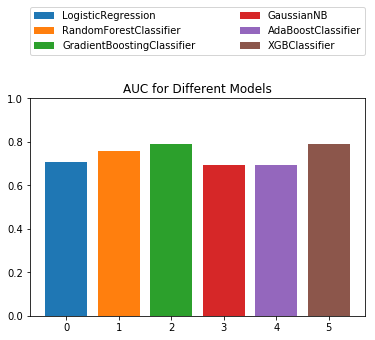

In [285]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['roc_auc'])
    plt.bar(i, model_results[model]['val']['roc_auc'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim([0,1])
plt.title("AUC for Different Models")
plt.show()

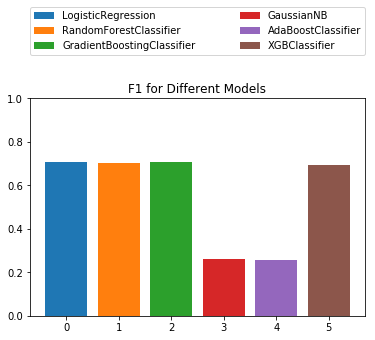

In [286]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['f1'])
    plt.bar(i, model_results[model]['val']['f1'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim([0,1])
plt.title("F1 for Different Models")
plt.show()

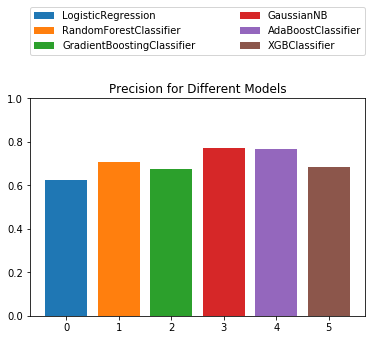

In [287]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['precision'])
    plt.bar(i, model_results[model]['val']['precision'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim([0,1])
plt.title("Precision for Different Models")
plt.show()

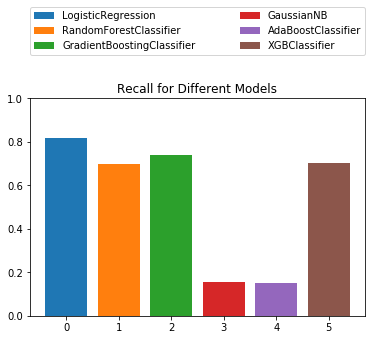

In [288]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['recall'])
    plt.bar(i, model_results[model]['val']['recall'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim([0,1])
plt.title("Recall for Different Models")
plt.show()

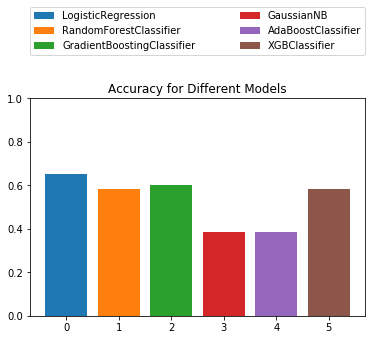

In [289]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['accuracy'])
    plt.bar(i, model_results[model]['val']['accuracy'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.title("Accuracy for Different Models")
plt.ylim([0,1])
plt.show()

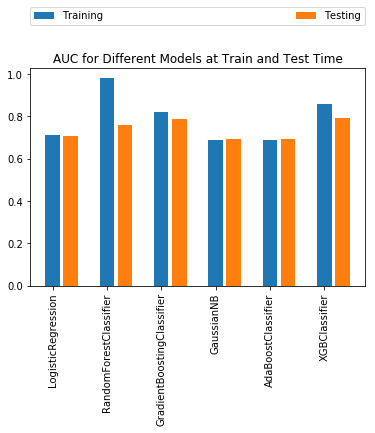

In [290]:
data_t = []
data_v = []
for (i,model) in enumerate(models_plot):
    data_t.append(model_results[model]['train']['roc_auc'])
    data_v.append(model_results[model]['val']['roc_auc'])
plt.bar([3*i for i in range(len(models_plot))], data_t)
plt.bar([3*i+1 for i in range(len(models_plot))], data_v)
plt.xticks(np.arange(0,3*len(models_plot),3), [str(m).split('(')[0] for m in models_plot],
          rotation='vertical')
plt.legend(["Training","Testing"],bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.title("AUC for Different Models at Train and Test Time")
plt.show()

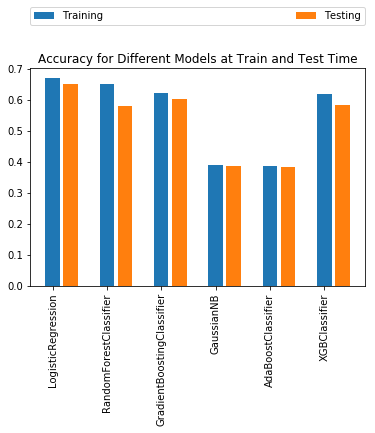

In [291]:
data_t = []
data_v = []
for (i,model) in enumerate(models_plot):
    data_t.append(model_results[model]['train']['accuracy'])
    data_v.append(model_results[model]['val']['accuracy'])
plt.bar([3*i for i in range(len(models_plot))], data_t)
plt.bar([3*i+1 for i in range(len(models_plot))], data_v)
plt.xticks(np.arange(0,3*len(models_plot),3), [str(m).split('(')[0] for m in models_plot],
          rotation='vertical')
plt.legend(["Training","Testing"],bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.title("Accuracy for Different Models at Train and Test Time")
plt.show()